In [1]:
import napari
import numpy as np
import pandas as pd
import pyclesperanto_prototype as cle
from skimage import io, measure, segmentation
import numpy as np

In [2]:
def generate_touch_count_image(g_img):
    touch_matrix = cle.generate_touch_matrix(cle.push(g_img))
    touch_matrix = cle.set_column(touch_matrix, 0, 0)
    counts = cle.count_touching_neighbors(touch_matrix)
    return cle.replace_intensities(g_img, counts)

## approach on simple data

In [3]:
# label_image = np.array([[0, 1, 2], [0, 3, 4], [0, 5, 0], [0, 0, 0]])
# intensity_image = np.array([[0, 10, 20], [0, 10, 10], [0, 10, 0], [0, 0, 0]])

In [4]:
label_image = np.array(
    [
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 0, 4, 4, 5, 5, 6, 6],
        [0, 0, 4, 4, 5, 5, 6, 6],
        [0, 0, 7, 7, 0, 0, 0, 0],
        [0, 0, 7, 7, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

intensity_image = np.array(
    [
        [0, 0, 10, 10, 20, 20, 20, 20],
        [0, 0, 10, 10, 20, 20, 20, 20],
        [0, 0, 10, 10, 10, 10, 20, 20],
        [0, 0, 10, 10, 10, 10, 20, 20],
        [0, 0, 10, 10, 0, 0, 0, 0],
        [0, 0, 10, 10, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

In [5]:
label_image

array([[0, 0, 1, 1, 2, 2, 3, 3],
       [0, 0, 1, 1, 2, 2, 3, 3],
       [0, 0, 4, 4, 5, 5, 6, 6],
       [0, 0, 4, 4, 5, 5, 6, 6],
       [0, 0, 7, 7, 0, 0, 0, 0],
       [0, 0, 7, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [6]:
intensity_image

array([[ 0,  0, 10, 10, 20, 20, 20, 20],
       [ 0,  0, 10, 10, 20, 20, 20, 20],
       [ 0,  0, 10, 10, 10, 10, 20, 20],
       [ 0,  0, 10, 10, 10, 10, 20, 20],
       [ 0,  0, 10, 10,  0,  0,  0,  0],
       [ 0,  0, 10, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

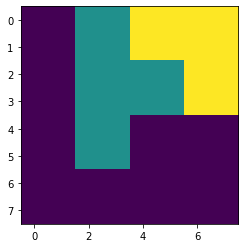

In [7]:
cle.imshow(cle.push(intensity_image))

In [8]:
tens_label_image = label_image * (intensity_image == 10)
twenties_label_image = label_image * (intensity_image == 20)

total_neigh_counts = generate_touch_count_image(label_image)

tens_neighbouring_tens_neigh_counts = generate_touch_count_image(tens_label_image)

twenties_neighbouring_twenties_neigh_counts = generate_touch_count_image(
    twenties_label_image
)

In [9]:
total_neigh_counts

cl.Array([[0., 0., 2., 2., 3., 3., 2., 2.],
       [0., 0., 2., 2., 3., 3., 2., 2.],
       [0., 0., 3., 3., 3., 3., 2., 2.],
       [0., 0., 3., 3., 3., 3., 2., 2.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
tens_neighbouring_tens_neigh_counts

cl.Array([[0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 3., 3., 1., 1., 0., 0.],
       [0., 0., 3., 3., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
twenties_neighbouring_twenties_neigh_counts

cl.Array([[0., 0., 0., 0., 1., 1., 2., 2.],
       [0., 0., 0., 0., 1., 1., 2., 2.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

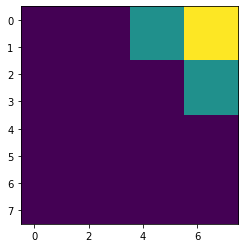

In [12]:
cle.imshow(twenties_neighbouring_twenties_neigh_counts)

In [13]:
tens_neighbouring_twenties_neigh_count = (
    total_neigh_counts
    - tens_neighbouring_tens_neigh_counts
    - twenties_neighbouring_twenties_neigh_counts
) * (intensity_image == 20)

tens_neighbouring_twenties_neigh_count

cl.Array([[0., 0., 0., 0., 2., 2., 0., 0.],
       [0., 0., 0., 0., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

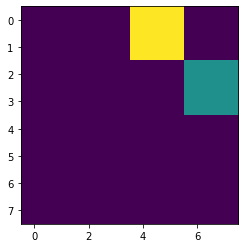

In [14]:
cle.imshow(tens_neighbouring_twenties_neigh_count)

In [15]:
twenties_neighbouring_tens_neigh_count = (
    total_neigh_counts
    - tens_neighbouring_tens_neigh_counts
    - twenties_neighbouring_twenties_neigh_counts
) * (intensity_image != 20)

twenties_neighbouring_tens_neigh_count

cl.Array([[0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 2., 0., 0.],
       [0., 0., 0., 0., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

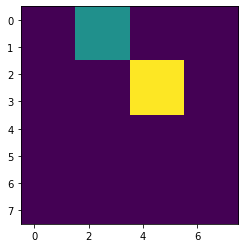

In [16]:
cle.imshow(twenties_neighbouring_tens_neigh_count)

In [17]:
img_tc = [
    total_neigh_counts,
    tens_neighbouring_tens_neigh_counts,
    twenties_neighbouring_twenties_neigh_counts,
    tens_neighbouring_twenties_neigh_count,
    twenties_neighbouring_tens_neigh_count,
]

img_tc = [cle.pull(img) for img in img_tc]

names_tc = [
    "total_neigh_counts",
    "10s_neighbouring_10s",
    "20s_neighbouring_20s",
    "10s_neighbouring_20s",
    "20s_neighbouring_10s",
]

In [18]:
def summarise(label_img, dict_of_touch_count_images):
    d = dict()
    d['label'] = np.unique(label_img)
    for name, im in dict_of_touch_count_images.items():
        l = list()
        for num in np.unique(label_img):
            l.append(np.unique(im[label_img == num]).astype(int)[0])
        d[name] = l
    return d

In [19]:
temp_dict = summarise(label_image, dict(zip(names_tc, img_tc)))

In [20]:
pd.DataFrame(temp_dict)

,label,total_neigh_counts,10s_neighbouring_10s,20s_neighbouring_20s,10s_neighbouring_20s,20s_neighbouring_10s
0,0,0,0,0,0,0
1,1,2,1,0,0,1
2,2,3,0,1,2,0
3,3,2,0,2,0,0
4,4,3,3,0,0,0
5,5,3,1,0,0,2
6,6,2,0,1,1,0
7,7,1,1,0,0,0
